In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_excel('dataset.xlsx',header =1)
df
df.head()
# Drop the 'Age' column from the original dataset
df = df.drop('Age', axis=1)

In [3]:
# Data exploration
# Checking the shape of the dataset (rows, columns)

print('Shape of dataset: ', df.shape)

Shape of dataset:  (1097, 11)


In [4]:
# checking for missing values
print('Number of missing values : ', df.isnull().sum())

Number of missing values :  Gender           0
S before         0
D before         0
Hr before        0
S after task     0
d after task     0
hr after task    0
s after m        0
d after m        0
hr after m       0
PSS              0
dtype: int64


In [5]:
# checking data types of the variables
print('Data types of the variables: ', df.dtypes)

Data types of the variables:  Gender           object
S before          int64
D before          int64
Hr before         int64
S after task      int64
d after task      int64
hr after task     int64
s after m         int64
d after m         int64
hr after m        int64
PSS               int64
dtype: object


In [6]:
# Check summary statistics of numerical variables
print('Summary statistics:\n', df.describe())

Summary statistics:
           S before     D before    Hr before  S after task  d after task  \
count  1097.000000  1097.000000  1097.000000   1097.000000   1097.000000   
mean    139.135825    85.470374    81.109389    144.599818     93.543300   
std      11.581304     9.121408     5.525560      9.039619      4.066755   
min     116.000000    70.000000    60.000000    129.000000     82.000000   
25%     129.000000    77.000000    76.000000    137.000000     90.000000   
50%     138.000000    86.000000    81.000000    144.000000     94.000000   
75%     149.000000    94.000000    86.000000    152.000000     97.000000   
max     160.000000   100.000000    91.000000    160.000000    100.000000   

       hr after task    s after m    d after m   hr after m          PSS  
count    1097.000000  1097.000000  1097.000000  1097.000000  1097.000000  
mean       90.613491   129.546035    84.144029    78.143118    16.432088  
std         6.759295     5.866670     3.180581     5.100856     9.178

In [7]:
# Data visualization


Text(0.5, 1.0, 'Gender distribution')

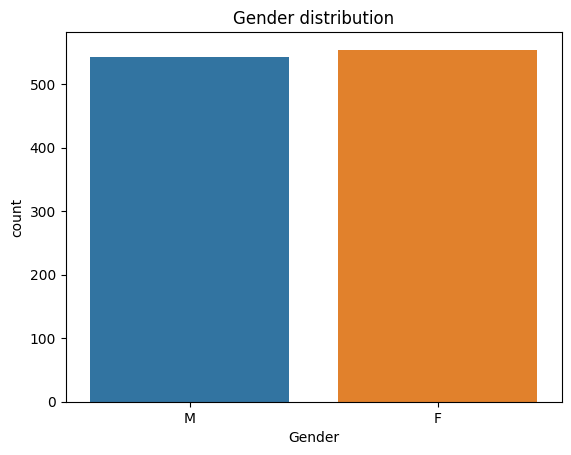

In [8]:
# Create a countplot of the gender variable
sns.countplot(data=df, x='Gender')
plt.title('Gender distribution')

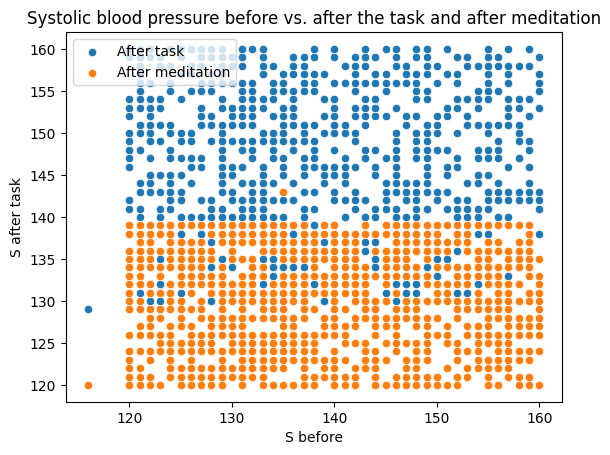

In [9]:
# Creating a scatter plot of systolic blood pressure before vs. after the task and after meditation
sns.scatterplot(data=df, x='S before', y='S after task', label='After task')
sns.scatterplot(data=df, x='S before', y='s after m', label='After meditation')
plt.title('Systolic blood pressure before vs. after the task and after meditation')
plt.legend()


Text(0.5, 1.0, 'Diastolic blood pressure before vs. after the task and after meditation')

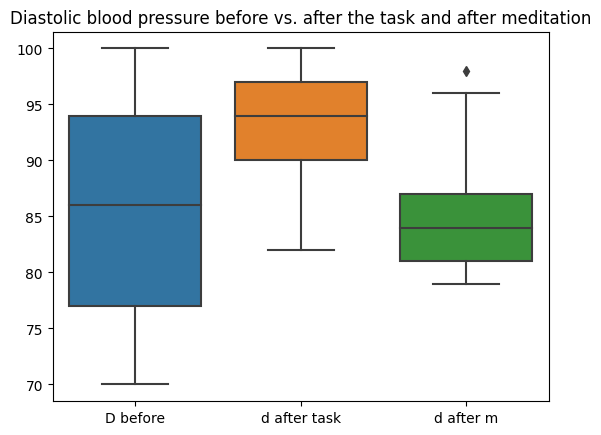

In [10]:
# Create a box plot of diastolic blood pressure before vs. after the task and after meditation
sns.boxplot(data=df[['D before', 'd after task', 'd after m']])
plt.title('Diastolic blood pressure before vs. after the task and after meditation')

Text(0.5, 1.0, 'Heart rate before vs. after the task and after meditation')

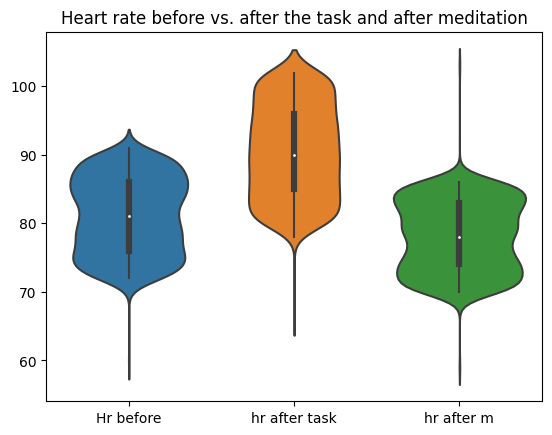

In [11]:
# Create a violin plot of heart rate before vs. after the task and after meditation
sns.violinplot(data=df[['Hr before', 'hr after task', 'hr after m']])
plt.title('Heart rate before vs. after the task and after meditation')

Text(0.5, 1.0, 'Correlation matrix')

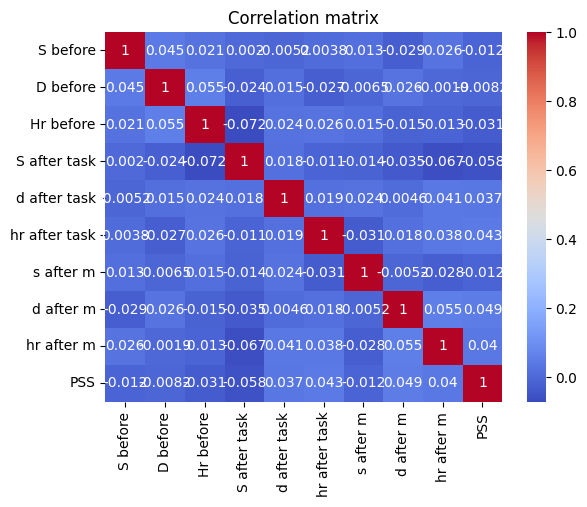

In [12]:
# Create a heatmap of the correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')

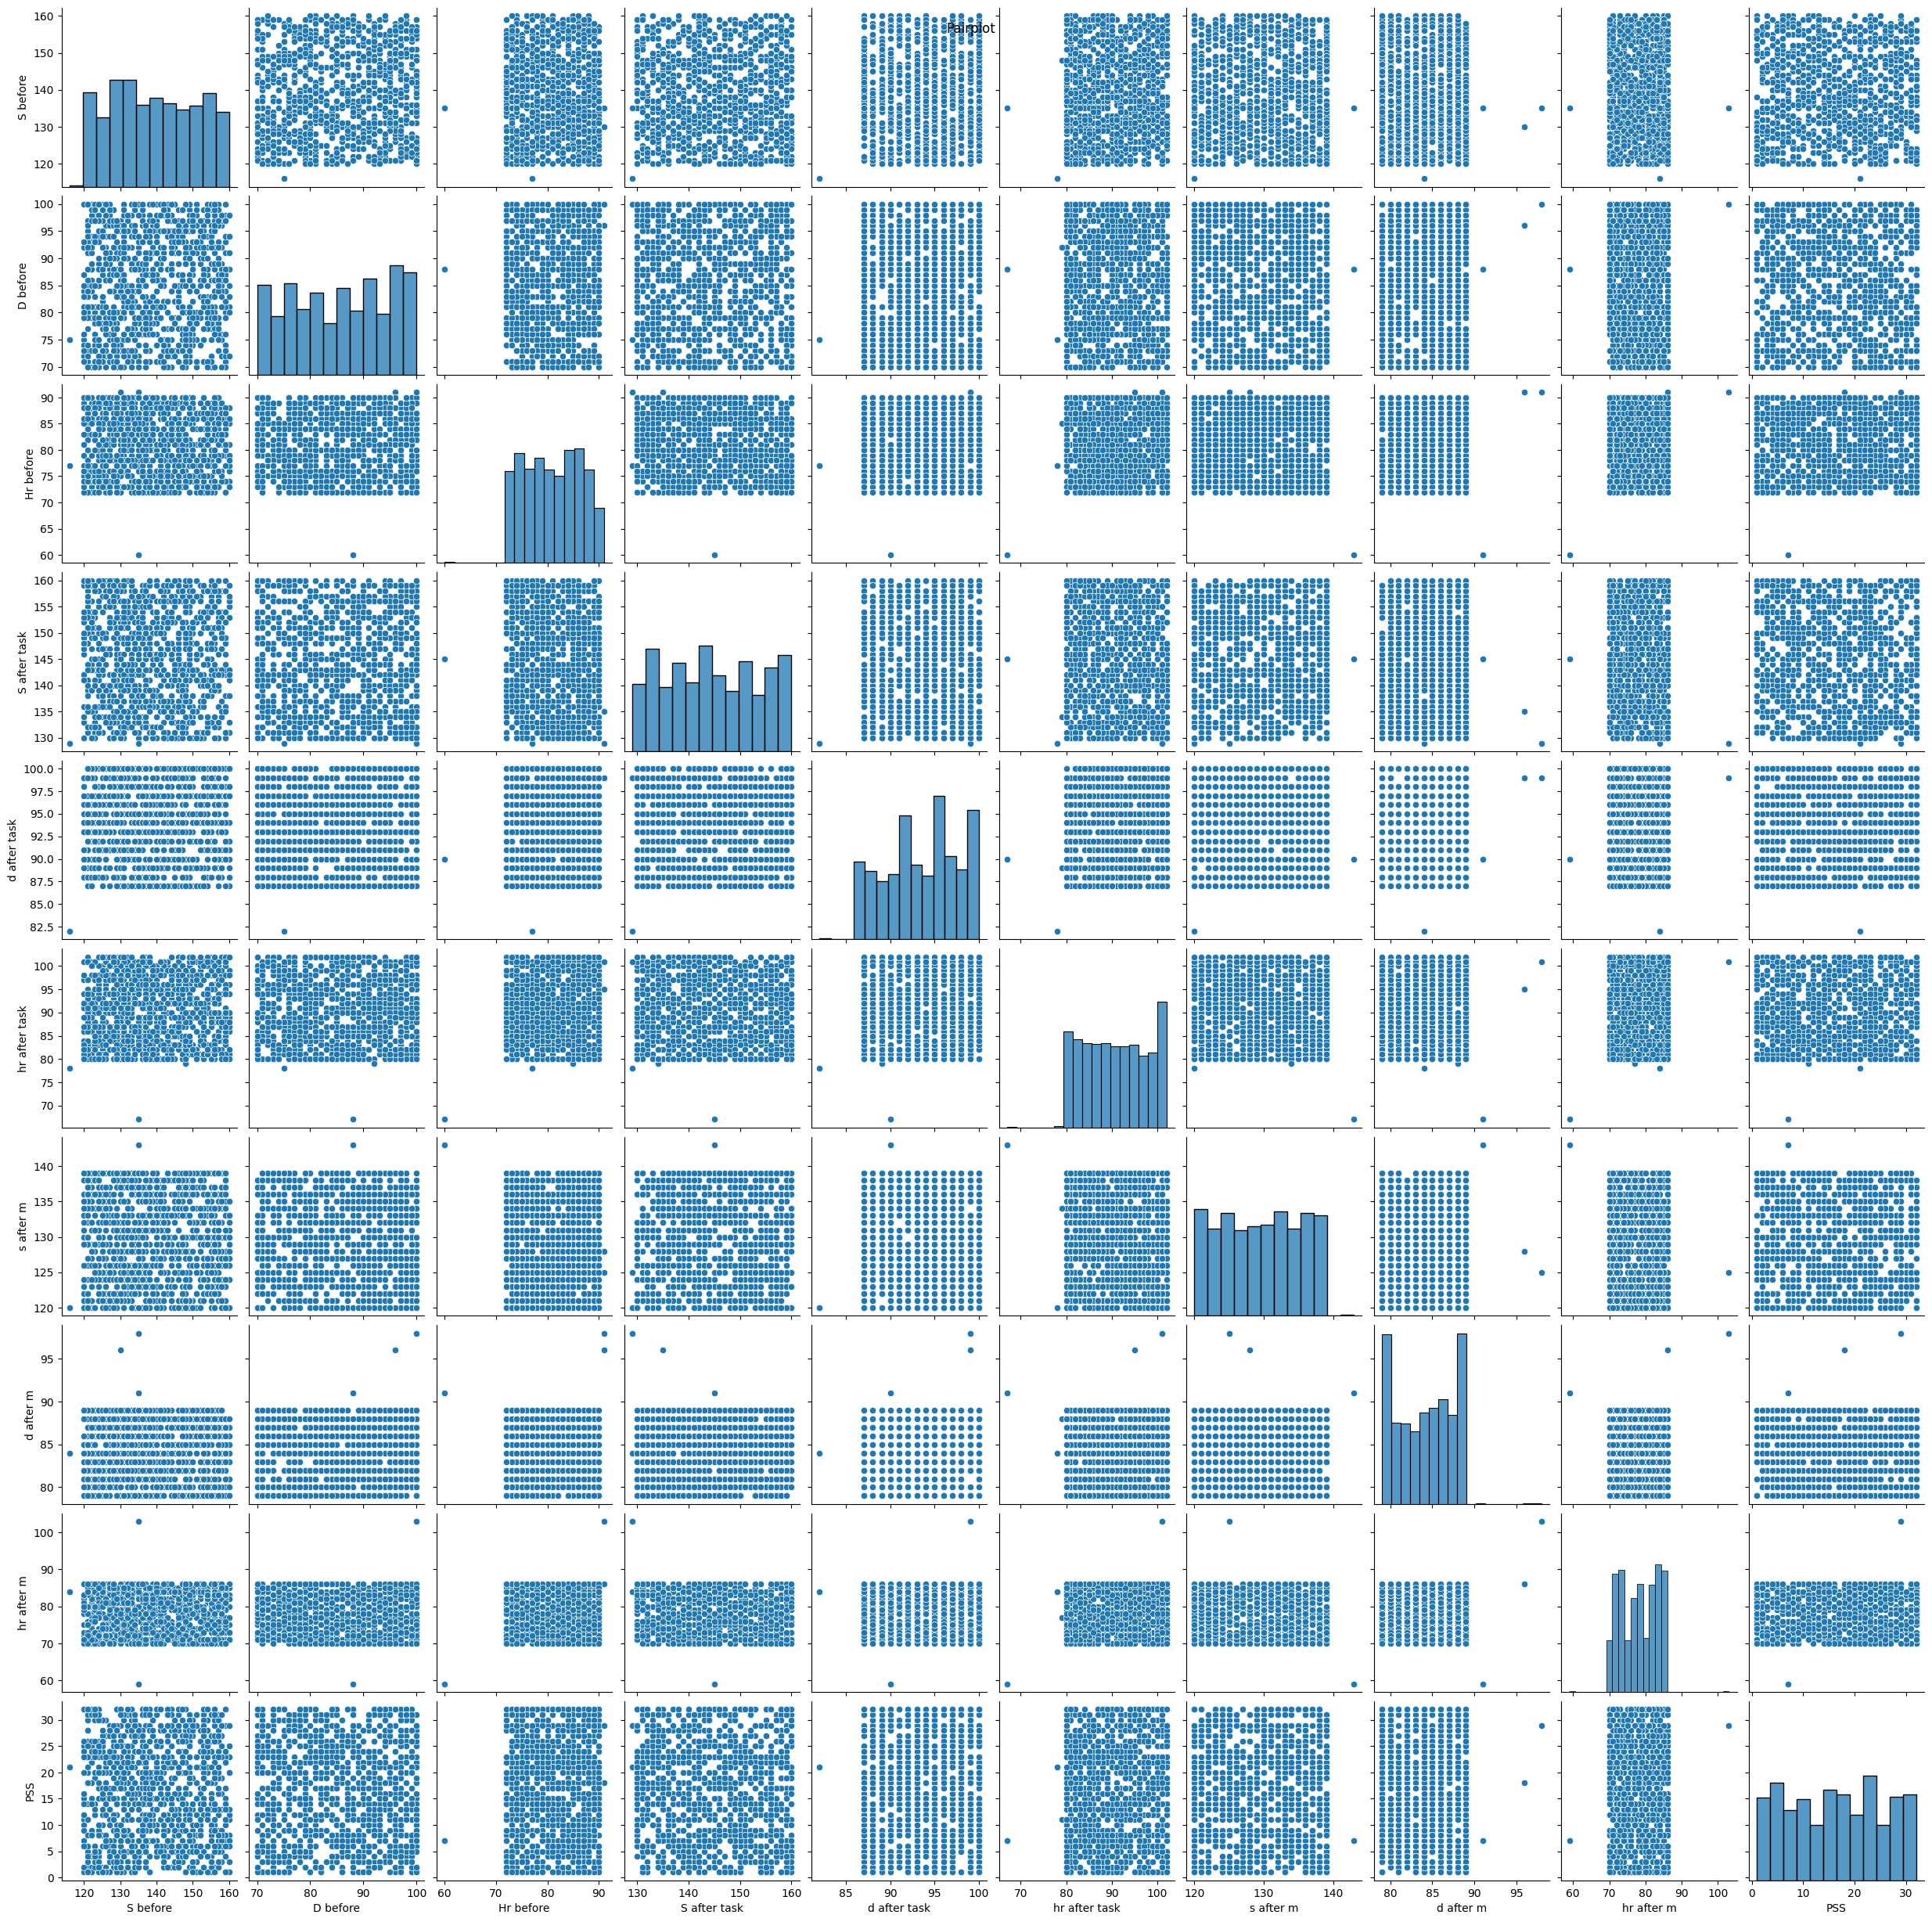

In [13]:

# Create a pairplot to visualize the relationships between all pairs of variables
sns.pairplot(data=df, diag_kind='hist')
plt.suptitle('Pairplot')
plt.show()

In [14]:
# Defining the independent variable (X) and the dependent variable (y)
X = df.drop('PSS', axis=1)
y = df['PSS']

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
# Converting Gender to a numeric format using one-hot encoding
enc = OneHotEncoder(drop='first')
gender_encoded = enc.fit_transform(df[['Gender']]).toarray()
gender_labels = enc.get_feature_names(['Gender'])
df_gender = pd.DataFrame(gender_encoded, columns=gender_labels)
df = pd.concat([df, df_gender], axis=1)
df = df.drop('Gender', axis=1)

C:\Users\Johnb\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
# Defining the independent variable (X) and the dependent variable (y) for linear regression
X_linear = df.drop('PSS', axis=1)
y_linear = df['PSS']
X_linear
# y_linear

,S before,D before,Hr before,S after task,d after task,hr after task,s after m,d after m,hr after m,Gender_M
0,123,71,75,143,89,92,134,86,85,1.0
1,145,79,72,133,88,98,135,81,74,0.0
2,142,77,83,149,99,87,131,85,85,0.0
3,145,94,90,147,94,99,134,80,72,1.0
4,149,99,72,136,88,102,137,85,81,0.0
...,...,...,...,...,...,...,...,...,...,...
1092,124,100,84,134,94,80,130,87,85,1.0
1093,139,81,83,138,94,86,127,88,73,1.0
1094,134,95,85,139,92,86,132,84,79,1.0
1095,123,93,87,140,92,91,133,85,80,0.0


In [18]:
# Define the category cutoffs
cutoffs = [0, 13, 26, float('inf')]

# Define the category labels
labels = ['Normal', 'Moderate', 'Abnormal']

# Use the cut() method to assign category labels based on the PSS score ranges
df['PSS_category'] = pd.cut(df['PSS'], bins=cutoffs, labels=labels)
# Print the distribution of categories
print(df['PSS_category'].value_counts())

Moderate    460
Normal      443
Abnormal    194
Name: PSS_category, dtype: int64


In [19]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'PSS_category' column to numerical values
df['PSS_category'] = le.fit_transform(df['PSS_category'])

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['PSS', 'PSS_category'], axis=1), df['PSS_category'], test_size=0.1, random_state=42)

In [21]:
# Fit a linear regression model to the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
X_test
y_test

44     1
568    2
56     0
636    0
486    1
      ..
898    0
390    1
541    2
280    1
841    2
Name: PSS_category, Length: 110, dtype: int32

In [22]:
# Make predictions on the testing data
y_pred_linear = linear_model.predict(X_test)

In [23]:
# Fit a logistic regression model to the training data
logistic_model = LogisticRegression(max_iter=10000000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000000)

In [24]:
# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test)

In [25]:
# Calculate the predictions for the linear regression model
y_pred_linear = linear_model.predict(X_test)

# Calculate the mean squared error and mean absolute error for the linear regression model
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

In [26]:
# Print the MSE and MAE for the linear regression model
print(f"Linear regression MSE: {mse:.2f}")
print(f"Linear regression MAE: {mae:.2f}")

Linear regression MSE: 0.62
Linear regression MAE: 0.67


In [27]:
# Calculate the predictions for the logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

In [28]:
# Print the classification report for the logistic regression model
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.38      0.59      0.46        44
           2       0.33      0.32      0.33        44

    accuracy                           0.36       110
   macro avg       0.24      0.30      0.26       110
weighted avg       0.29      0.36      0.32       110



C:\Users\Johnb\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Johnb\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Johnb\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)